<h3><b>Introduction to Data Analytics - Exercise set 4, exercise 3a.</b></h3>
<h4><b>US Unemployment dataset</b></h4>
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_4/calendar.png" />


<b>Tip:</b> You can just click "Run All" to see the results of this notebook. Some of these exercises have some heavy plots that can take even 1 minute to produce.


<b>Remember:</b> not every dataset has interesting correlations and/or features (too much randomness or variance usually, or not enough data). Also, not each correlation implies there's a causation. Finally, not every plot is useful, that's why it's important to try multiple plots in order to "see under the hood". Typically pair plots, joint plots, regression plots, heatmaps and box plots are most useful, but there are some exceptions too.

<h3><b>Quick summary of data:</b></h3>

<p>This dataset contains unemployment rates from year 1948 to 2019 in the USA.</p>
<p>This notebook is a perfect example why pivot tables and heatmaps are so important. It also demonstrates the fantastic feature in pandas called "melt".</p>
<p>Kaggle page: <a href="https://www.kaggle.com/datasets/tunguz/us-monthly-unemployment-rate-1948-present">https://www.kaggle.com/datasets/tunguz/us-monthly-unemployment-rate-1948-present</a></p>

<h3><b>Questions for this exercise:</b></h3>
<b>Answer the questions either as code comments or as markdown. Use separate cells to write your answers.</b><br/><br/>
<li>You should see two extensive unemployment periods in the dataset. What are these years, and can find you any info by using Google on these years in US unemployment?</li>
<li>Which seaborn plots are useful in this notebook, and which are not? Why? (you can remove the unnecessary plots from this notebook if you wish too).</li>
<li>Which are more useful in this case, correlations or plots? Or are they both useful?</li>

<b>Extra questions/tasks for extra points:</b>
<li>Any other ideas about this dataset? Any ways to expand or improve the dataset and the analysis?</li>


<hr />

<h4><b>Imports and load the original dataset</b></h4>

In [1]:
# import the common data analytics modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# disable scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

<h4><b>Helper functions for dataset cleaning</b></h4>

In [2]:
# helper function for pandas to convert string format month names to a corresponding number
# numbers are much more useful when it comes to heatmaps, since it puts the months in order
# note: a more neat way to do this would be use the value mapping feature in pandas
def month_to_numeric(row):
    month = row['Month']

    # map the needed month
    if month == "Jan":
        return 1
    elif month == "Feb":
        return 2
    elif month == "Feb":
        return 3
    elif month == "Mar":
        return 4
    elif month == "Apr":
        return 5
    elif month == "Jun":
        return 6
    elif month == "Jul":
        return 7
    elif month == "Aug":
        return 8
    elif month == "Sep":
        return 9
    elif month == "Oct":
        return 10
    elif month == "Nov":
        return 11
    elif month == "Dec":
        return 12

<h4><b>Processing data</b></h4>

In [3]:
# read the dataset and create a correlation matrix
df = pd.read_csv("USUnemployment.csv")
correlations = df.corr().round(2)

# this function in pandas is called "melt", and it's one of
# the more impressive features in pandas. with loops, this would be
# a tedious operation to be done

# here's an example what melt-function does:

# original DataFrame:
# Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
# 1948,3.4,3.8,4.0,3.9,3.5,3.6,3.6,3.9,3.8,3.7,3.8,4.0
# 1949,4.3,4.7,5.0,5.3,6.1,6.2,6.7,6.8,6.6,7.9,6.4,6.6
# 1950,6.5,6.4,6.3,5.8,5.5,5.4,5.0,4.5,4.4,4.2,4.2,4.3

# after melt, the format is this:
# Year, Month,  Value
# 1948, 1,      3.4
# 1949, 1,      4.3
# 1950, 1,      6.5

# and so on. you can use the Data Viewer to compare df and df2
# remember the melt-function every time you have TimeSeries -data,
# but it's not yet very compatible for pivot table and heatmap

df2 = df.melt(id_vars=["Year"], 
             var_name="Month",
             value_name="Value")

# convert year to integer (better for heatmaps)
# also switch month string format to an integer by using the helper function (see code above)
df2['Year'] = df2['Year'].astype(int)
df2['Month'] = df2.apply(month_to_numeric, axis=1)

# create pivot table for a later heatmap
pt = df2.pivot_table(index='Month', columns='Year', values='Value')

<h4><b>seaborn plots - heatmaps for correlations matrices</b></h4>

<Axes: >

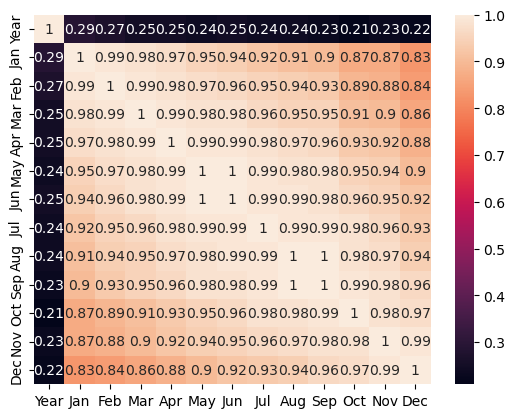

In [4]:
# basic heatmap for original data correlation matrix
sns.heatmap(correlations, annot=True)

<Axes: >

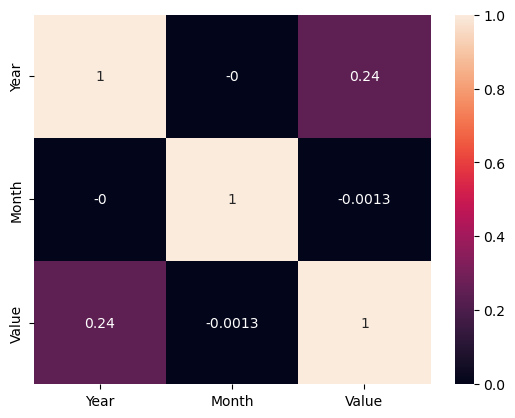

In [5]:
# basic heatmap for melted correlation matrix
sns.heatmap(df2.corr().round(4), annot=True)

<h4><b>seaborn plots - joint plots and pivot table heatmap</b></h4>

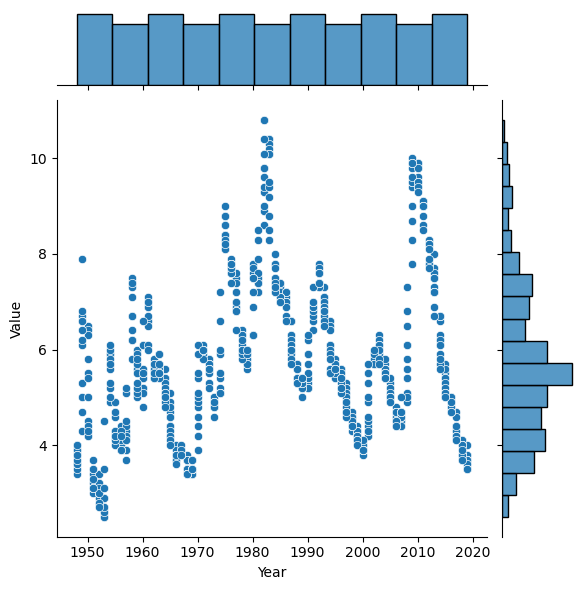

In [6]:
# basic joint plot for unemployment value and year
sns.jointplot(x='Year', y='Value', data=df2)

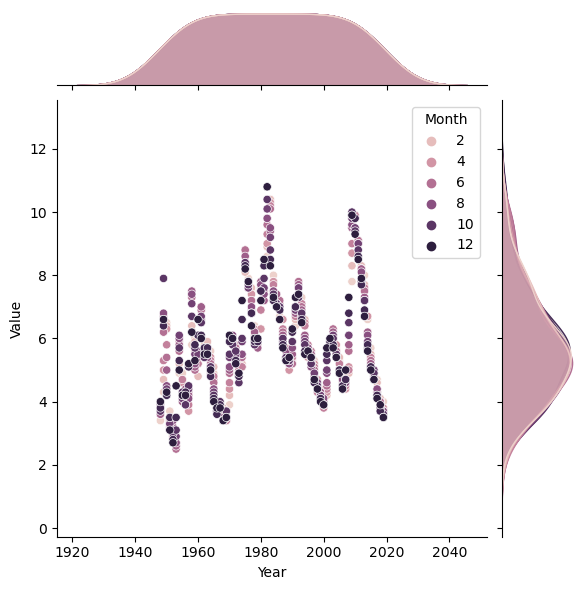

In [7]:
# basic joint plot for unemployment value and year, hue on month
sns.jointplot(x='Year', y='Value', data=df2, hue='Month')

<Axes: xlabel='Year', ylabel='Month'>

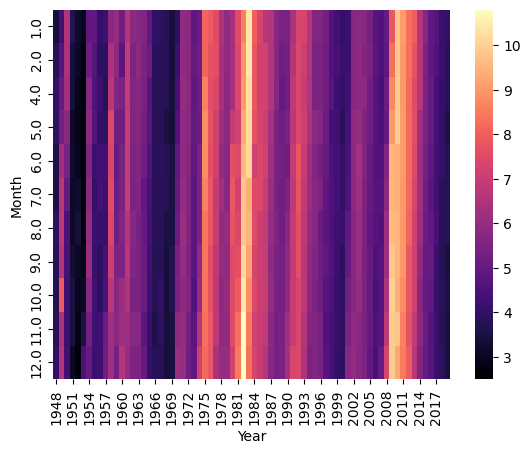

In [8]:
# heatmap for pivot table
sns.heatmap(pt, cmap='magma') 